In [610]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled, visualize_TI_3D_pyvista

TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)
TI_3D = np.concatenate([TI for _ in range(64)], axis=2)  # (250, 250, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [611]:
# visulaization 3D training image
visualize_TI_3D_pyvista(TI_3D)

Widget(value='<iframe src="http://localhost:58942/index.html?ui=P_0x27759f90e90_69&reconnect=auto" class="pyvi…

In [ ]:
####################################################################
##  original demo without hard data conditioning for 64 x 64 x 8  ##
####################################################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 8
template_size = [5, 5, 5]
level_size = 2
n_level = 4
unique_facies = list(np.unique(TI_3D).astype(np.int8))
num_hard_data = 3

real = multi_points_modeling_multi_scaled(TI_3D, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data = None, verbose = True)

[MPS] multi-scale MPS starts
------------------------------
<Scale 3 start> Grid size is (8, 8, 1)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.00 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.21 seconds.
<Scale 3 start> Done
no no no
------------------------------
<Scale 2 start> Grid size is (16, 16, 2)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.06 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.28 seconds.
<Scale 2 start> Done
no no no
------------------------------
<Scale 1 start> Grid size is (32, 32, 4)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.43 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 36.93 seconds.
<Scale 1 start> Done


In [ ]:
# 3D realization without hard data conditioning
# 64 64 8
visualize_TI_3D_pyvista(real)

Widget(value='<iframe src="http://localhost:58942/index.html?ui=P_0x276a2657a10_73&reconnect=auto" class="pyvi…

In [677]:
##################################################################
##  original demo with hard data conditioningfor 64 x 64 x 8   ##
##################################################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 8
template_size = [5, 5, 5]
level_size = 2
n_level = 4
unique_facies = list(np.unique(TI_3D).astype(np.int8))
num_hard_data = 3

z_max = max(1, real_nz)
hard_data = pd.DataFrame({
    'x': np.random.randint(0, real_nx, num_hard_data),
    'y': np.random.randint(0, real_ny, num_hard_data),
    'z': np.random.randint(0, z_max, num_hard_data),
    'facies': [unique_facies[np.random.randint(0, len(unique_facies))] for _ in range(num_hard_data)]
})

real = multi_points_modeling_multi_scaled(TI_3D, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data = hard_data, verbose = True)

[MPS] multi-scale MPS starts
------------------------------
<Scale 3 start> Grid size is (8, 8, 1)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.00 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.01 seconds.
<Scale 3 start> Done
no no no
------------------------------
<Scale 2 start> Grid size is (16, 16, 2)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.04 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.24 seconds.
<Scale 2 start> Done
no no no
------------------------------
<Scale 1 start> Grid size is (32, 32, 4)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.43 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 37.26 seconds.
<Scale 1 start> Done


In [678]:
visualize_TI_3D_pyvista(real)

Widget(value='<iframe src="http://localhost:58942/index.html?ui=P_0x275a1545e50_79&reconnect=auto" class="pyvi…

In [ ]:
##########################################
##  original demo for 64x64x1           ##
##########################################

random_seed = 7771
real_nx, real_ny, real_nz = 64, 64, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, 
                                          hard_data= None, verbose = False)

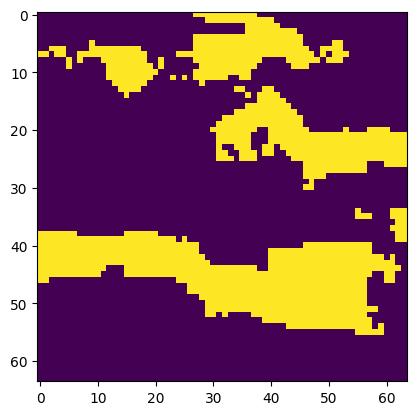

In [ ]:
# 2D realization without hard data conditioning
plt.imshow(real)

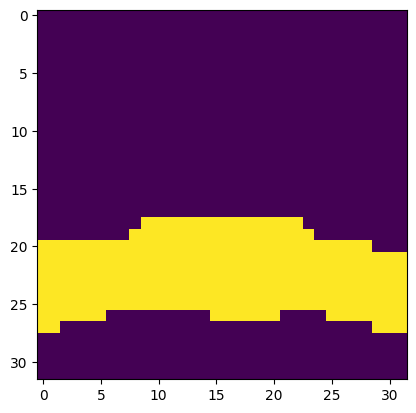

In [679]:
plt.imshow(TI[:32, :32])

In [680]:
soft_data = np.ones((32, 32, 1, 2))*-1
tau = 0.9
soft_data[...,0] = ((1-TI[:32,:32])*tau) + (1-tau)
soft_data[...,1] = (TI[:32,:32]*tau) + (1-tau)

Text(0.5, 1.0, '7771')

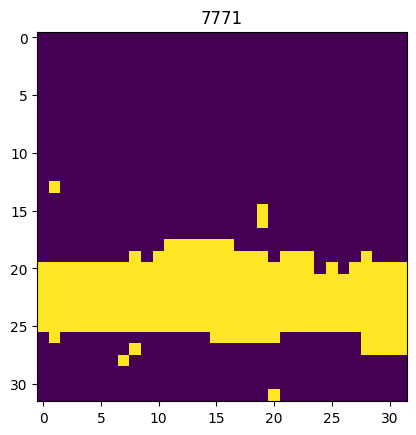

In [682]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, hard_data = None, soft_data=soft_data)
plt.imshow(real)
plt.title(f'{random_seed}')